<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number = 06

Group Members:

Names  Student IDs


## Task-1

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('Group_19_06_A.csv', delimiter =',')
display(df.info())
#removing sympol which make a problem with data and correct it (changing object to numper with propreate colume)
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace("SAR", "").replace(',','')))
df["KM_Driven"]=df["KM_Driven"].apply(lambda x: int(x.replace("mts", "")))
f=df["Model_Price"].isna().tolist()
df["Model_Price"]=df["Model_Price"].apply(lambda x:  x if not f else str(x).replace("SAR", "").replace(',',''))
df["Model_Price"]=df["Model_Price"].apply(lambda x:  int(x.replace('nan','0')))
#replace the null value of num column (model price) with its mean because it is the only num colmns that have num value
total=0
r=0
list1=df["Model_Price"].tolist()
for x in list1:
    if x!=0:
        r=r+1
        total=x+total
mean=total/r
mean=int(mean)
df["Model_Price"]=df["Model_Price"].apply(lambda x:  int(str(x).replace('0',str(mean))))
display(df.info())
#check for obeject variable in each  to fix the wrong spelling and capitalition: 
for m in df.select_dtypes(include="object").columns:
    print(df[m].unique())
#change the the capital variable to small to compl
df['Type'] = df['Type'].apply(lambda x :x.lower()) 
# correct the spelling of Manufacturer to give the right name of the company  
df['Manufacturer'] = df['Manufacturer'].apply(lambda x : x.replace('Masda','Mazda').replace('Shevy','Chevy')
                                              .replace('Honta','Honda').replace('Nesshan','Nissan')
                                              .replace('Wolksvagon','Volkswagen').replace("Huendae",'Hyundai').
                                              replace("Fourd",'Ford').replace("Toyoda",'Toyota').replace("JournalMotors",'GeneralMotors').replace
                                              ("BeEmW",'BMW').replace("Geep",'Jeep').replace
                                              ("Mercetes",'Mercedes')) 
#Here we change the name of location from descriptive to long name and correct some spellings
df['Location'] = df['Location'].apply(lambda x : x.replace('Medina','Madinah').replace('Mecca','Makkah')
                                              .replace('DMM','Dammam').replace('RYD','Riyadh')
                                              .replace('AdDhahran','Dhahran').replace("JED",'Jeddah')) 
# there are some variable are not reasonable to be negative becuse it is a history
# History Has negative value which means it does not make sense
seleted_columns= df.select_dtypes(exclude='object').columns
df[seleted_columns]=df[seleted_columns].applymap(lambda x: x if x>=0 else abs(x))
#fix null value in the data by filling it with mean for num and mode for obj
# Here we fill the NAN value by mode for categorical data and by mean for numerical data
null_columns=df.columns[df.isna().any()]
for d in null_columns:
    value = df[d].mean() if df[d].dtype!='object' else df[d].mode()
    df[d].fillna(value,inplace=True)
# Romving the ouliers for each columns by using the interquartile method
num_columns = df.select_dtypes(exclude='object').columns
for a in num_columns:
    Q3, Q1 = np.percentile(df[a], [75 ,25])
    IQR = Q3 - Q1
    UperWhisker = Q3 + 1.5*IQR
    LowerWhisker = Q3 - 1.5*IQR
    index_row = df[ (df[a]>UperWhisker) | (df[a]<LowerWhisker) ].index
    df.drop(index_row , inplace=True)
# Here we fix the inconssistancy of data types
# fixing the inconssistancy of data types
obj_columns = df.select_dtypes('object').columns
num_columns = df.select_dtypes(exclude='object').columns
print(obj_columns)
print(num_columns)
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      3000 non-null   object 
 1   Type              3000 non-null   object 
 2   Cylinders         3000 non-null   int64  
 3   Model_Year        3000 non-null   int64  
 4   Model_Price       2136 non-null   object 
 5   Sold_Year         3000 non-null   int64  
 6   Sale_Price        3000 non-null   object 
 7   KM_Driven         3000 non-null   object 
 8   KPL               3000 non-null   float64
 9   Power             3000 non-null   object 
 10  Class             3000 non-null   object 
 11  Location          3000 non-null   object 
 12  Accident_History  3000 non-null   int64  
 13  Owner_History     3000 non-null   int64  
 14  Color             3000 non-null   object 
 15  Seller_Type       3000 non-null   object 
 16  Service_History   3000 non-null   int64  


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      3000 non-null   object 
 1   Type              3000 non-null   object 
 2   Cylinders         3000 non-null   int64  
 3   Model_Year        3000 non-null   int64  
 4   Model_Price       3000 non-null   int64  
 5   Sold_Year         3000 non-null   int64  
 6   Sale_Price        3000 non-null   int64  
 7   KM_Driven         3000 non-null   int64  
 8   KPL               3000 non-null   float64
 9   Power             3000 non-null   object 
 10  Class             3000 non-null   object 
 11  Location          3000 non-null   object 
 12  Accident_History  3000 non-null   int64  
 13  Owner_History     3000 non-null   int64  
 14  Color             3000 non-null   object 
 15  Seller_Type       3000 non-null   object 
 16  Service_History   3000 non-null   int64  


None

['Masda' 'Shevy' 'Honta' 'Nesshan' 'Huendae' 'Fourd' 'Toyoda'
 'JournalMotors' 'BeEmW' 'Geep' 'Wolksvagon' 'Mercetes']
['suv' 'sedan' 'SEDAN' 'crossover' 'SUV' 'CROSSOVER']
['4WD' '2WD']
['premium' 'standard']
['Makkah' 'Dhahran' 'Riyadh' 'Madinah' 'Medina' 'Dammam' 'Mecca' 'Jeddah'
 'DMM' 'RYD' 'AdDhahran' 'JED']
['Silver' 'Brown' 'Black' 'White' 'Blue' 'Gray' 'Red']
['company' 'individual']
Index(['Manufacturer', 'Type', 'Power', 'Class', 'Location', 'Color',
       'Seller_Type'],
      dtype='object')
Index(['Cylinders', 'Model_Year', 'Model_Price', 'Sold_Year', 'Sale_Price',
       'KM_Driven', 'KPL', 'Accident_History', 'Owner_History',
       'Service_History'],
      dtype='object')


Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0             Mazda        suv          4        2004       135663       2010   
3             Honda      sedan          6        2006        78413       2013   
6            Nissan        suv          4        2005       115313       2010   
9              Ford      sedan          6        1996        64326       2000   
11           Toyota      sedan          6        1998        68837       2002   
...             ...        ...        ...         ...          ...        ...   
2991        Hyundai        suv          4        1999        87543       2002   
2992  GeneralMotors      sedan          8        1995        87543       2000   
2994          Mazda      sedan          4        2003        52779       2010   
2996  GeneralMotors        suv          4        1998        87543       2001   
2999        Hyundai  crossover          4        2002    869387543       2004   

      Sale_Price  KM_Driven    KPL Power     Class Location  Accident_History  \
0          67661     134265  10.33   4WD   premium   Makkah                 2   
3          34845     369553  22.53   2WD   premium  Madinah                 3   
6          59214     217995  18.24   2WD   premium   Dammam                10   
9          32449      78549   6.26   2WD  standard  Madinah                 9   
11         46238      55083  17.07   4WD  standard   Makkah                 4   
...          ...        ...    ...   ...       ...      ...               ...   
2991       45616   70663000  13.80   2WD  standard   Riyadh                10   
2992       31964      45579   4.86   4WD  standard  Madinah                 4   
2994       24938     351269  14.14   2WD  standard  Madinah                 2   
2996       71377      60047   3.23   4WD  standard   Jeddah                 5   
2999       69630      78564  19.39   2WD   premium   Dammam                 2   

      Owner_History   Color Seller_Type  Service_History  
0                 4  Silver     company                0  
3                 4   White  individual                0  
6                 2    Blue  individual                0  
9                 3     Red  individual                0  
11                2     Red  individual                0  
...             ...     ...         ...              ...  
2991              3   White     company                0  
2992              4    Blue  individual                0  
2994              3   Black  individual                0  
2996              2   White  individual                1  
2999              2  Silver  individual                0  

[1377 rows x 17 columns]

## Task-2

Index(['Manufacturer', 'Type', 'Power', 'Class', 'Location', 'Color',
       'Seller_Type'],
      dtype='object')


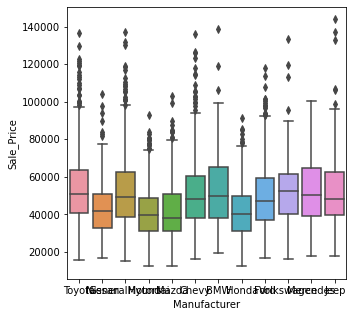

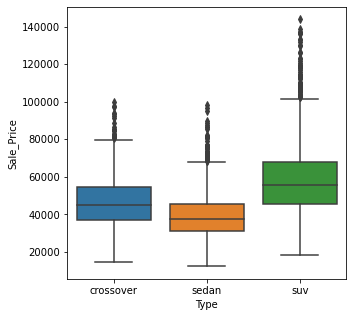

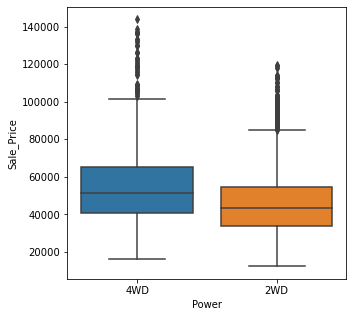

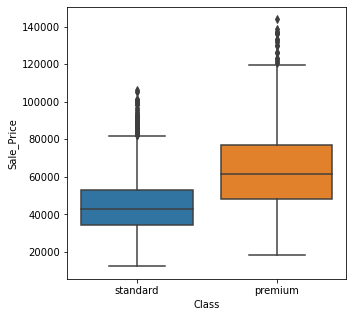

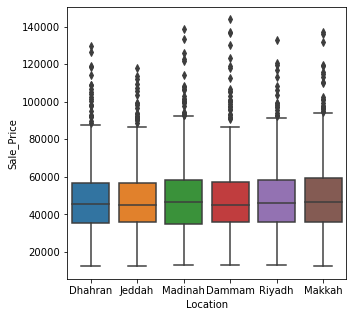

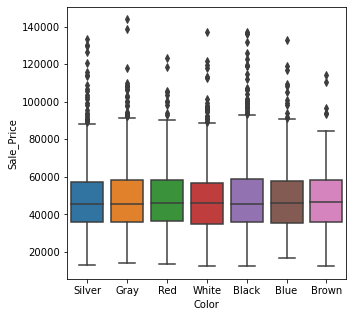

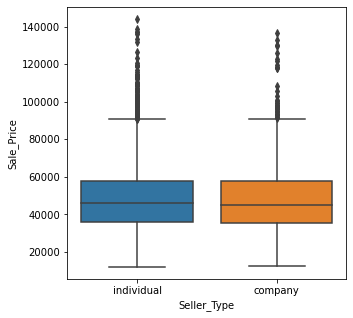

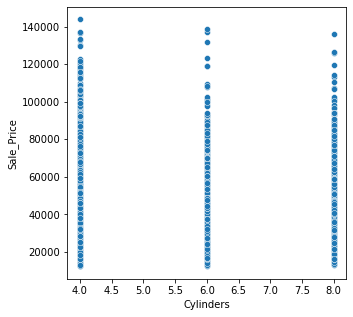

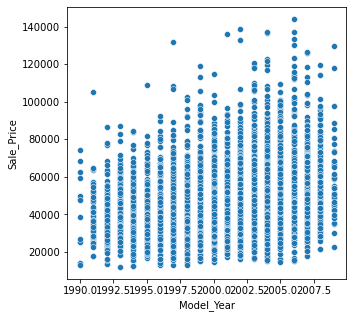

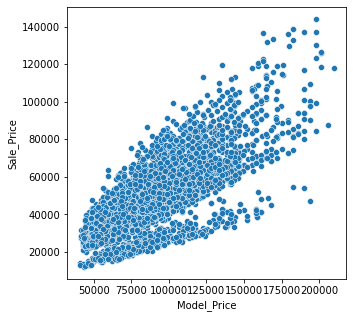

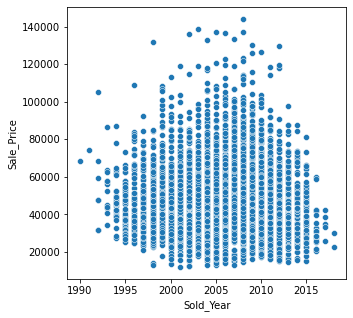

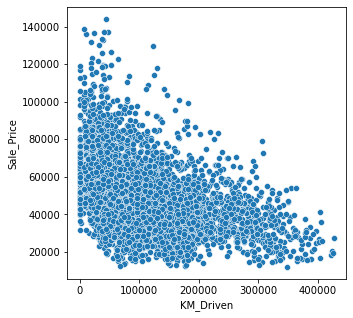

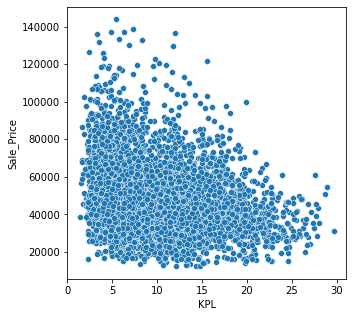

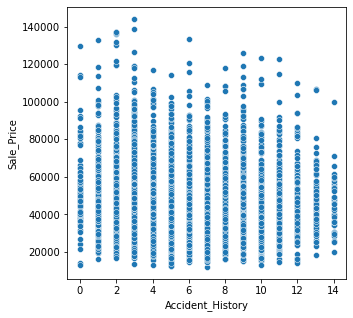

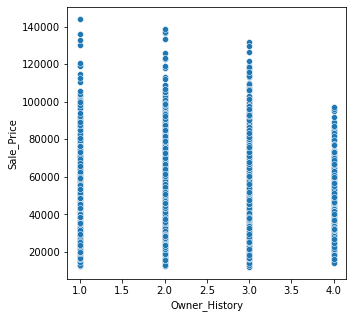

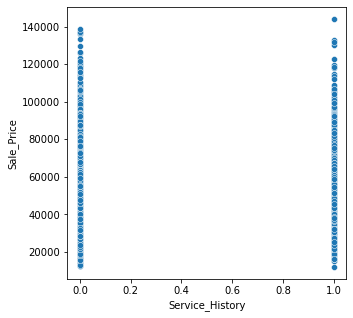

Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0            Toyota  crossover          4        2003        91202       2009   
1            Toyota      sedan          4        2009        85590       2015   
2            Nissan        suv          6        1995        67569       1999   
3            Toyota        suv          6        2000       107427       2002   
4     GeneralMotors        suv          4        2003       110836       2010   
...             ...        ...        ...         ...          ...        ...   
4995          Honda        suv          4        2000        89522       2006   
4996         Toyota        suv          4        2006       120980       2013   
4997           Ford  crossover          4        2001        85225       2007   
4998           Ford      sedan          4        1999        81916       2001   
4999          Honda      sedan          6        2003        63334       2004   

      Sale_Price  KM_Driven    KPL Power     Class Location  Accident_History  \
0          44837     138556  12.40   4WD  standard  Dhahran                 8   
1          48722     143829  16.67   4WD  standard   Jeddah                 5   
2          39556      70443   7.48   2WD  standard  Madinah                 7   
3          85675      85751   4.98   4WD  standard   Dammam                 1   
4          47382     137935   4.63   2WD  standard   Riyadh                 4   
...          ...        ...    ...   ...       ...      ...               ...   
4995       51698     117723  16.92   4WD  standard   Riyadh                 2   
4996       59476     236973  11.40   4WD  standard   Makkah                 8   
4997       38255     130141   7.21   2WD  standard   Riyadh                 5   
4998       51127      22781   5.90   4WD  standard   Makkah                 5   
4999       47880      17211  11.09   4WD  standard   Dammam                11   

      Owner_History   Color Seller_Type  Service_History  
0                 4  Silver  individual                0  
1                 3    Gray  individual                0  
2                 2     Red  individual                1  
3                 2   White     company                0  
4                 1   Black     company                0  
...             ...     ...         ...              ...  
4995              2    Blue  individual                0  
4996              1    Gray  individual                0  
4997              3   White     company                1  
4998              2     Red  individual                0  
4999              3   Black     company                0  

[5000 rows x 17 columns]

['Toyota' 'Nissan' 'GeneralMotors' 'Hyundai' 'Mazda' 'Chevy' 'BMW' 'Honda'
 'Ford' 'Volkswagen' 'Mercedes' 'Jeep']
['crossover' 'sedan' 'suv']
['4WD' '2WD']
['standard' 'premium']
['Dhahran' 'Jeddah' 'Madinah' 'Dammam' 'Riyadh' 'Makkah']
['Silver' 'Gray' 'Red' 'White' 'Black' 'Blue' 'Brown']
['individual' 'company']


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('Group_06_10_B.csv', delimiter =',')
#removing sympol which make a problem with data and correct it (changing object to numper with propreate colume)
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace("SAR", "").replace(',','')))
f=df["Model_Price"].isna().tolist()
df["Model_Price"]=df["Model_Price"].apply(lambda x:  x if not f else str(x).replace("SAR", "").replace(',',''))
df["Model_Price"]=df["Model_Price"].apply(lambda x:  int(x.replace('nan','0')))
obj_columns = df.select_dtypes('object').columns
num_columns = df.select_dtypes(exclude='object').columns.drop("Sale_Price")
print(obj_columns)
# correct the spelling of Manufacturer to give the right name of the company  
df['Manufacturer'] = df['Manufacturer'].apply(lambda x : x.replace('Masda','Mazda').replace('Shevy','Chevy')
                                              .replace('Honta','Honda').replace('Nesshan','Nissan')
                                              .replace('Wolksvagon','Volkswagen').replace("Huendae",'Hyundai').
                                              replace("Fourd",'Ford').replace("Toyoda",'Toyota').replace("JournalMotors",'GeneralMotors').replace
                                              ("BeEmW",'BMW').replace("Geep",'Jeep').replace
                                              ("Mercetes",'Mercedes')) 
# After we clean the data now we will creat the Pair wise plots: boxplot for Categorical- scatterplot for numerical
for c in obj_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y="Sale_Price",x=c,data=df);
    plt.show()
for c in num_columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(y="Sale_Price",x=c,data=df);
    plt.show()
display(df)
for m in df.select_dtypes(include="object").columns:
    print(df[m].unique())

## Task-3

In [35]:
corr = df.corr(method = 'pearson') #identify the correlation
print('the top three that are related to sale price')
display(corr.sort_values(by=['Sale_Price'], inplace=False, ascending=False)["Sale_Price"].head(3)) #find the top three that are related to sale price by sort it and take the top three
print('the bottom three the weakly related to sale price')
display(corr.sort_values(by=['Sale_Price'], inplace=False, ascending=True)["Sale_Price"].head(3)) #find the bottom three that are related to sale price by sort it and take the top three

the top three that are related to sale price


Sale_Price     1.000000
Model_Price    0.734289
Model_Year     0.219964
Name: Sale_Price, dtype: float64

the bottom three the weakly related to sale price


KM_Driven          -0.380068
KPL                -0.271801
Accident_History   -0.100160
Name: Sale_Price, dtype: float64

## Task-4

Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0          Chevy  crossover          4        2002        86930       2008   
1  GeneralMotors      sedan          6        1992        71313       2000   
2         Toyota      sedan          4        2004        64601       2010   
3         Toyota        suv          6        2001       153406       2009   
4  GeneralMotors        suv          4        2000       104443       2002   
5  GeneralMotors      sedan          4        2004        75368       2007   
6         Nissan      sedan          4        2004        53834       2007   
7          Honda        suv          6        2002       108662       2004   
8          Chevy      sedan          4        1996        64326       2003   
9        Hyundai        suv          8        2003       133003       2008   

   Sale_Price  KM_Driven    KPL Power  ... Location Accident_History  \
0       37162      44187   6.23   2WD  ...   Dammam                8   
1       19206     170950   7.53   4WD  ...   Dammam                4   
2       36774     118164  17.15   2WD  ...   Dammam                4   
3       52925      58450   8.57   4WD  ...   Dammam                2   
4       72250      67859   5.00   2WD  ...   Makkah                1   
5       42648     143272   6.90   2WD  ...  Madinah                2   
6       33240     157240  16.76   2WD  ...   Jeddah                8   
7       83081      17995   7.53   2WD  ...   Jeddah                3   
8       27499      58556   4.94   2WD  ...  Dhahran                8   
9       65357      36497   7.49   4WD  ...  Madinah                8   

   Owner_History   Color Seller_Type Service_History  depreciation  \
0              2   Black  individual               0      9.541777   
1              2  Silver  individual               1      9.133503   
2              2   White  individual               0      7.179197   
3              1  Silver  individual               0      8.187506   
4              1     Red     company               1     15.411756   
5              4   Black  individual               0     14.471217   
6              3    Gray  individual               0     12.751545   
7              4     Red  individual               1     11.770904   
8              3    Gray  individual               0      8.178652   
9              3  Silver  individual               0     10.172101   

            pca1          pca2  return cars  
0  -88923.405156  -3158.242535         high  
1   90378.453687 -24983.482509         high  
2   15741.649550 -34584.154710         high  
3  -68889.113410  90882.229814         high  
4  -55482.168389  21657.501545       medium  
5   51227.558611 -19305.732366       medium  
6   71025.527432 -49730.670688       medium  
7 -126009.109315  27521.586317       medium  
8  -68556.138460 -35095.562629         high  
9  -99893.380749  61982.945793       medium  

[10 rows x 21 columns]

The input variables almost seperate high and low return cars


<Figure size 432x288 with 0 Axes>

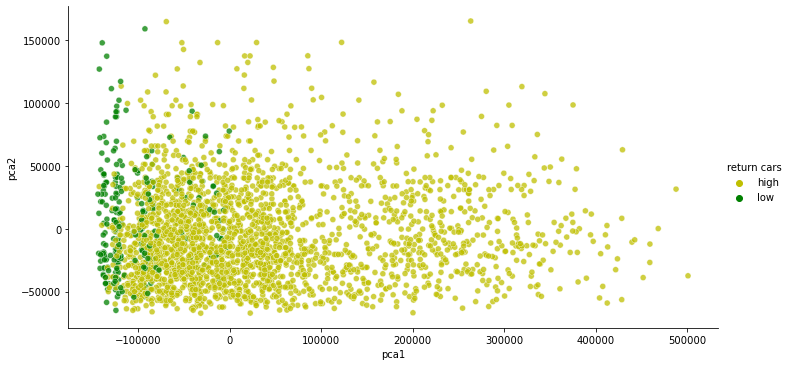

In [37]:
import numpy as np
ndf=df
#Creat a column to see the depreciation
ndf['depreciation'] = ((ndf['Model_Price']-ndf['Sale_Price'])/((ndf['Sold_Year']-ndf['Model_Year'])*(ndf['Model_Price'])))*100
ndf.replace([np.inf, -np.inf], np.nan, inplace=True)
#Delete the rows with inf values 
ndf.dropna(subset = ['depreciation'], inplace=True)

ndf['depreciation']=ndf['depreciation'].apply(lambda x: x if x>=0 else abs(x))

from sklearn.decomposition import PCA
#create columns for PCA1 and PCA2 to anaylze the data

num_columns = ndf.select_dtypes(exclude='object').columns
pca_input_columns = num_columns.drop(['Sale_Price'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ndf[pca_input_columns]) 
ndf['pca1'] = principalComponents[:,0]
ndf['pca2'] = principalComponents[:,1]

#Create column to rank the cars to high return cars or low return cars
plt.figure()
ndf['return cars'] = ndf['depreciation'].apply(lambda  x: 'low' if x>=20 else 'high' if x<=10 else 'medium')
relevant_data = (ndf['return cars'] == 'high') | (ndf['return cars'] == 'low') 
sns.relplot(x='pca1',y='pca2',
            hue='return cars', palette=['y','g'],
            kind='scatter',alpha=0.75,
            height=5, aspect=2,
            data=ndf[relevant_data])
display(ndf.head(10))
print("The input variables almost seperate high and low return cars")

## Task-5

<Figure size 432x288 with 0 Axes>

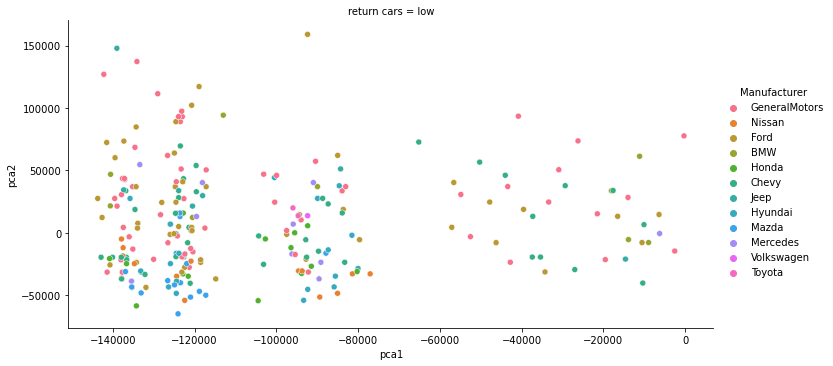

<Figure size 432x288 with 0 Axes>

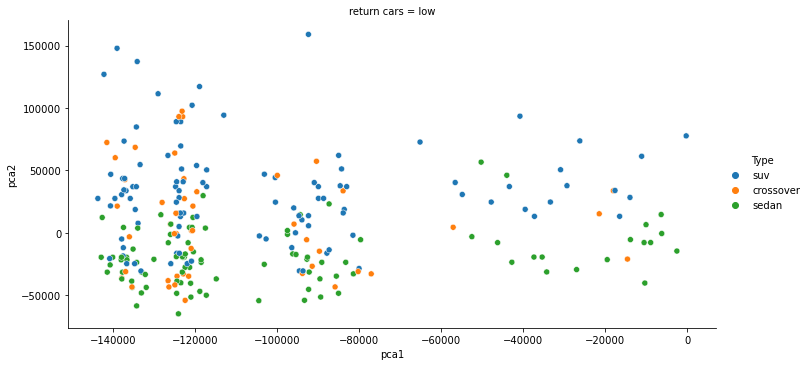

<Figure size 432x288 with 0 Axes>

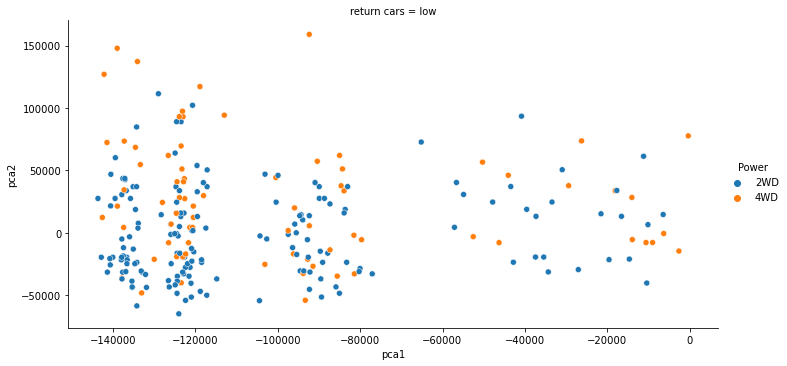

<Figure size 432x288 with 0 Axes>

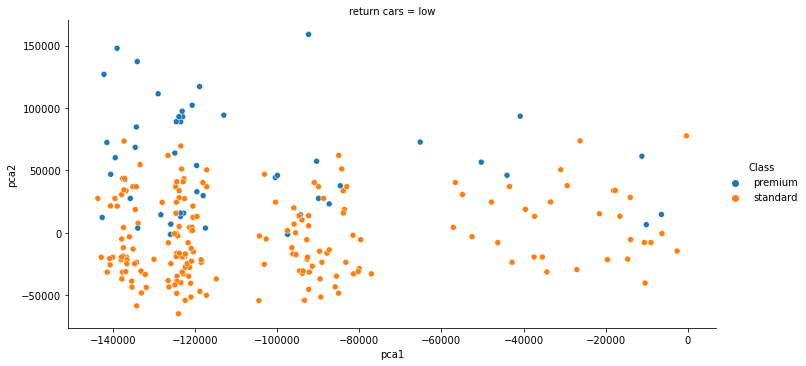

<Figure size 432x288 with 0 Axes>

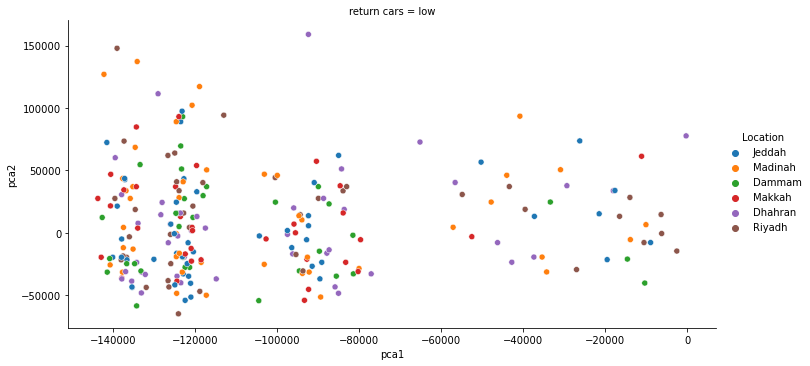

<Figure size 432x288 with 0 Axes>

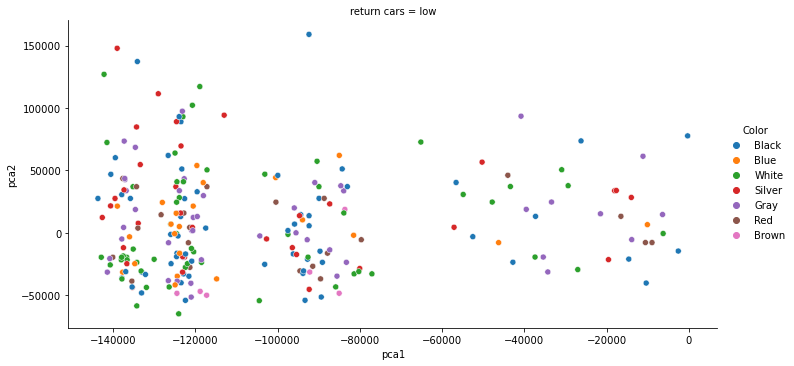

<Figure size 432x288 with 0 Axes>

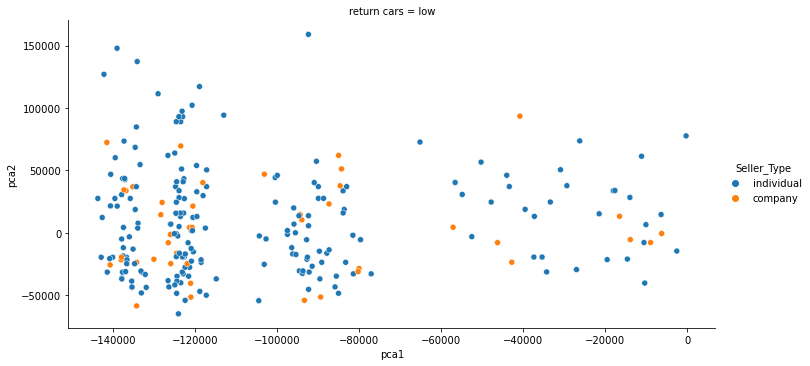

<Figure size 432x288 with 0 Axes>

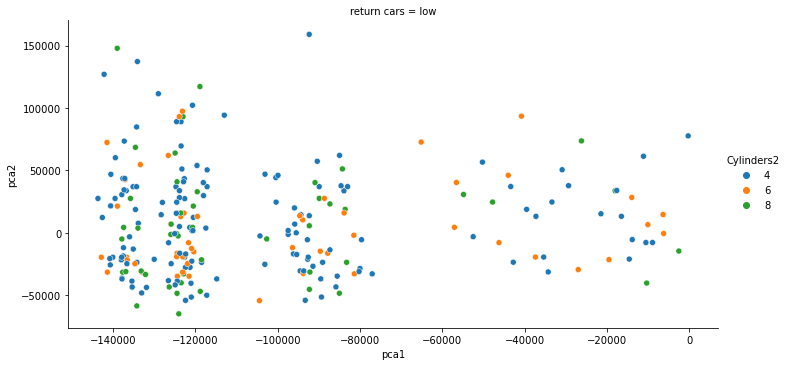

<Figure size 432x288 with 0 Axes>

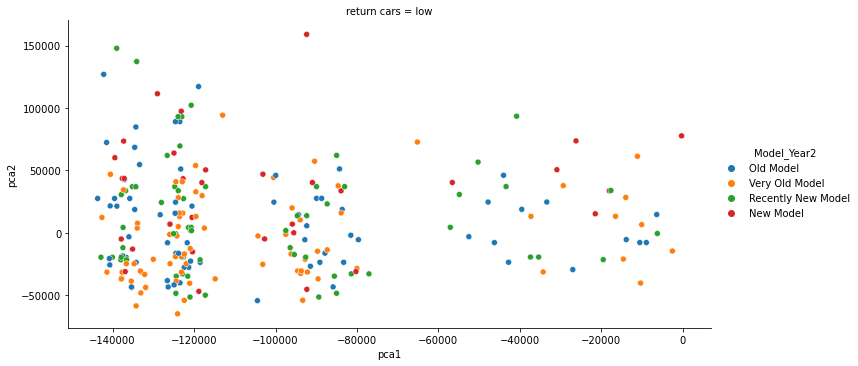

<Figure size 432x288 with 0 Axes>

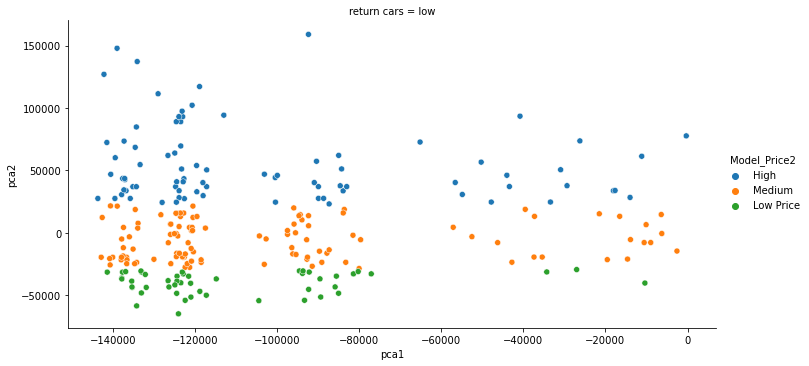

<Figure size 432x288 with 0 Axes>

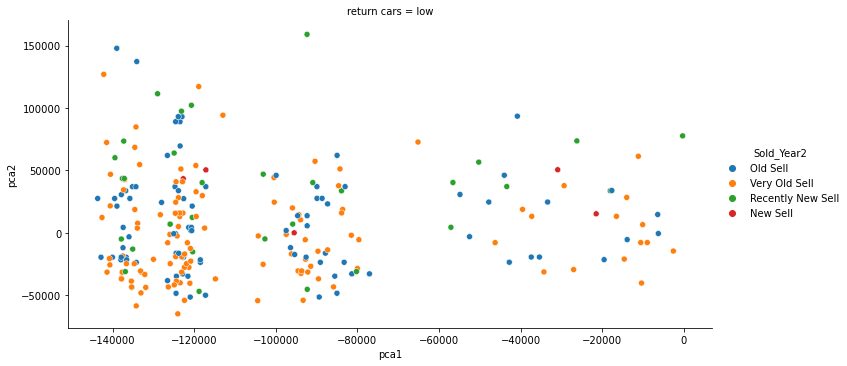

<Figure size 432x288 with 0 Axes>

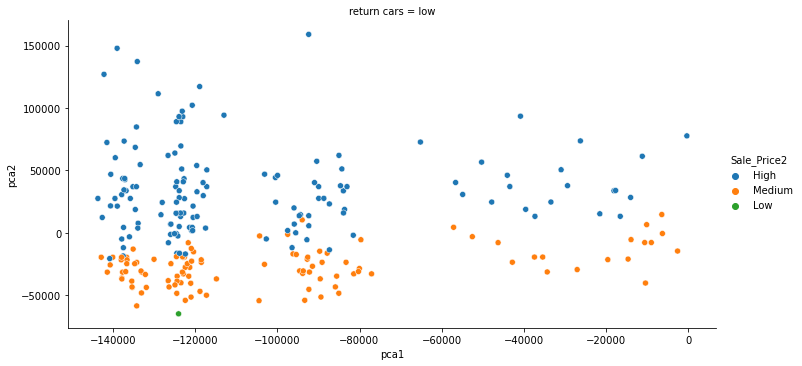

<Figure size 432x288 with 0 Axes>

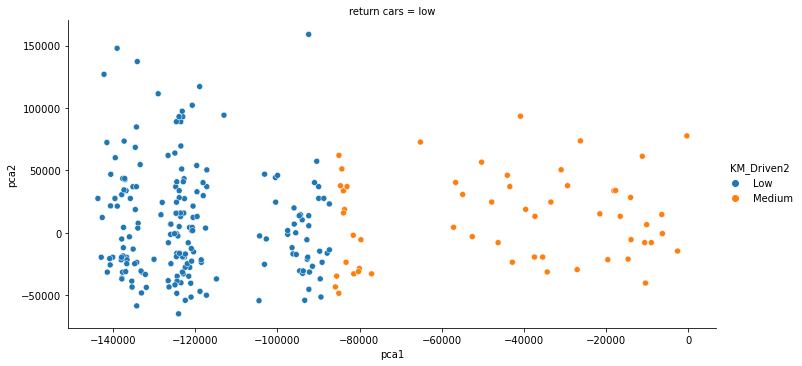

<Figure size 432x288 with 0 Axes>

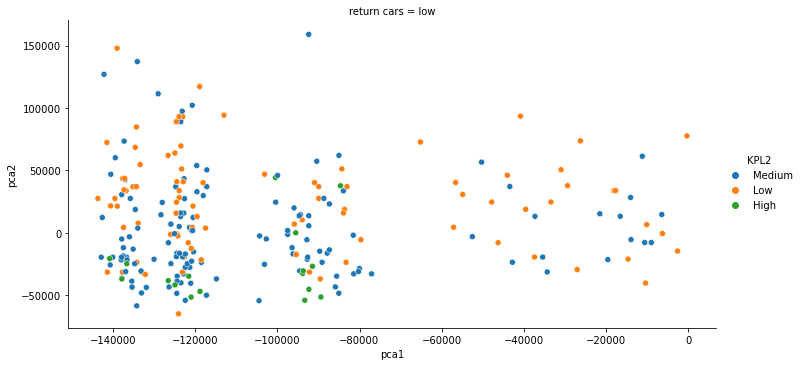

<Figure size 432x288 with 0 Axes>

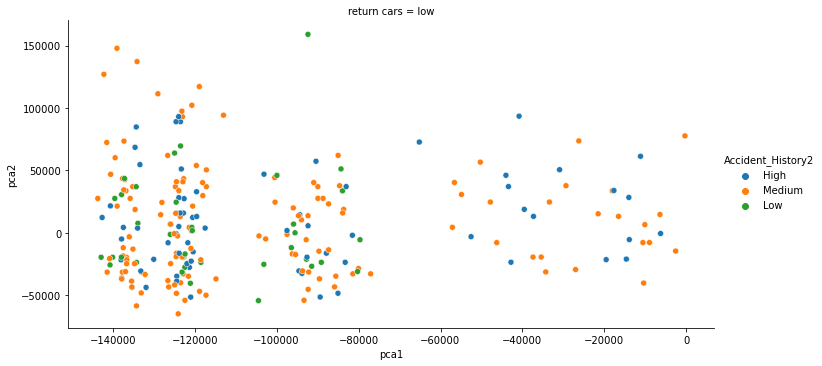

<Figure size 432x288 with 0 Axes>

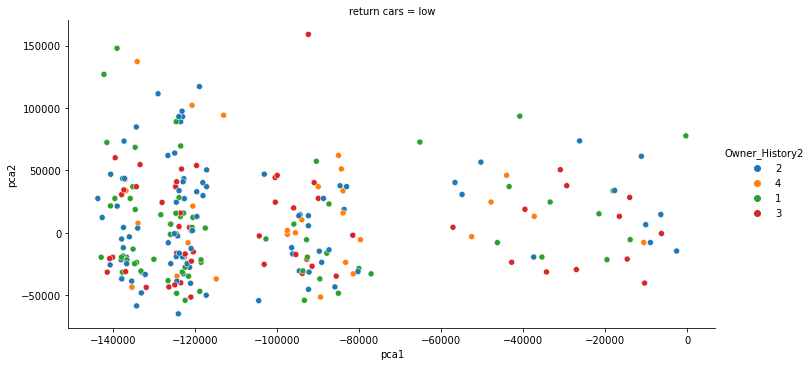

<Figure size 432x288 with 0 Axes>

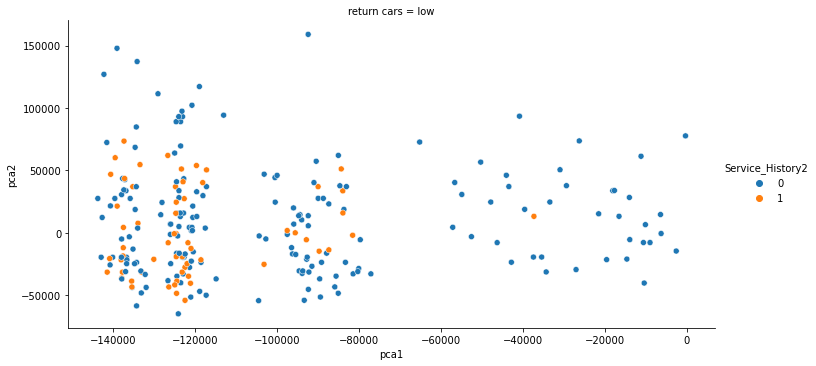

In [38]:
#array of the columns that have possible patterns
patterns=['Manufacturer','Type','Power','Class','Location','Color','Seller_Type','Cylinders2','Model_Year2','Model_Price2'
         ,'Sold_Year2','Sale_Price2','KM_Driven2','KPL2','Accident_History2','Owner_History2','Service_History2']

pdf = ndf
#Create new categorical columns by dividing the outcomes in fair intervals 
pdf["Cylinders2"]=ndf["Cylinders"].apply(lambda x: "4" if x==4 else "6" if x==6 else '8')
pdf["Owner_History2"]=ndf["Owner_History"].apply(lambda x: "1" if x==1 else "2" if x==2 else '3' if x==3 else '4')
pdf["Service_History2"]=pdf["Service_History"].apply(lambda x: "0" if x==0 else '1')
pdf["Model_Year2"]=ndf["Model_Year"].apply(lambda x: "Very Old Model" if x<=1998 else "Old Model" if x<=2002 else
                                           'Recently New Model' if x<=2005 else "New Model")
pdf["Sold_Year2"]=ndf["Sold_Year"].apply(lambda x: "Very Old Sell" if x<=2002 else 'Old Sell' if x<=2006 else
                                         "Recently New Sell" if x<=2009 else "New Sell")

#Create new numerical columns after classifying the categorical columns according to Q1,Q2,Q3
#Note: we try each categorical columns to get Q1,Q2,Q3 by this code: 
#display(pdf['categorical columns'].describe())
pdf["Model_Price2"]=ndf["Model_Price"].apply(lambda x: "Low Price" if x<=68555 else 'Medium' if x<=84014 else 'High')
pdf["Sale_Price2"]=ndf["Sale_Price"].apply(lambda x: "Low " if x<=36018 else 'Medium' if x<= 45701 else 'High')
pdf["KM_Driven2"]=ndf["KM_Driven"].apply(lambda x: "Low " if x<=47325 else 'Medium' if x<=84541 else 'High')
pdf["KPL2"]=pdf["KPL"].apply(lambda x: "Low " if x<=5.72 else 'Medium' if x<=8.78 else 'High')
pdf["Accident_History2"]=ndf["Accident_History"].apply(lambda x: "Low " if x<=3 else 'Medium' if x<=5 else 'High')

#Draw the graphs for low performing estates
sCol = ndf['return cars'] == 'low'
xdf = pdf.loc[sCol,:]
for i in patterns:
    plt.figure()
    sns.relplot(x="pca1",y="pca2",data=xdf,col='return cars',aspect=2, hue=i)
    plt.show()

In [52]:
display(pdf['Service_History'].unique())

array([0, 1], dtype=int64)

## Task-6

<Figure size 432x288 with 0 Axes>

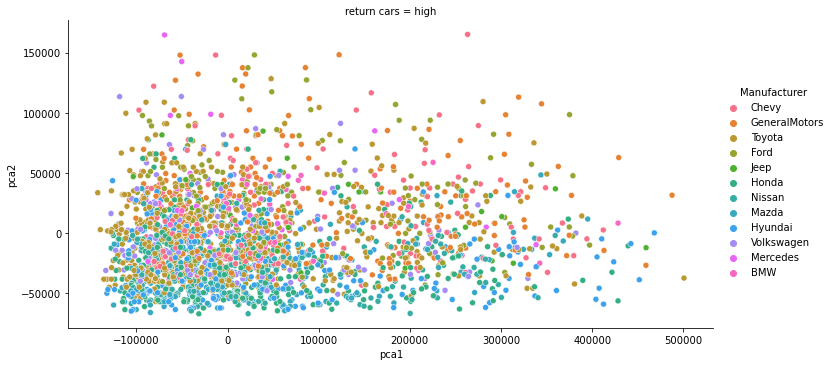

<Figure size 432x288 with 0 Axes>

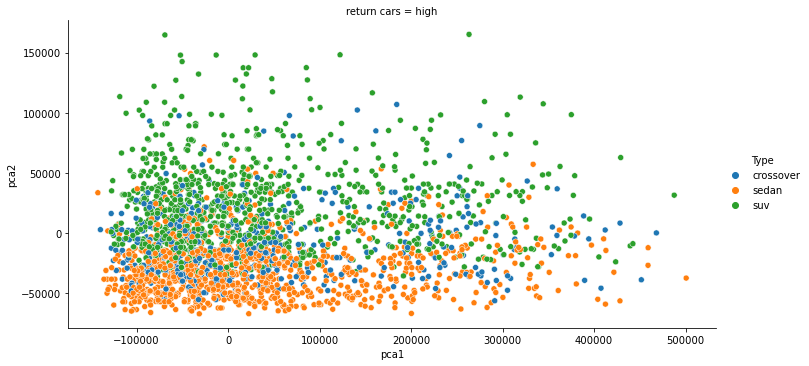

<Figure size 432x288 with 0 Axes>

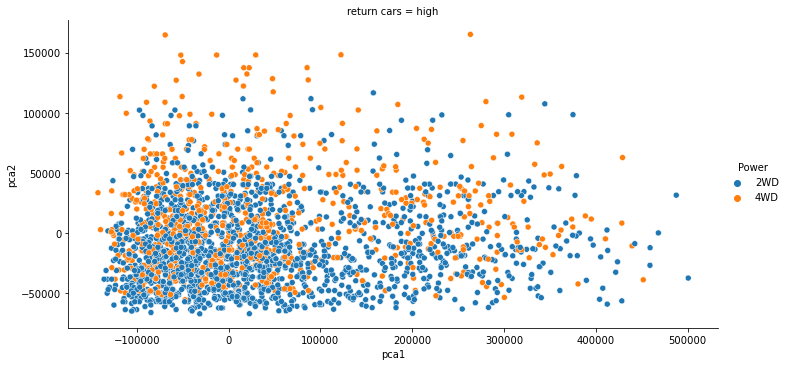

<Figure size 432x288 with 0 Axes>

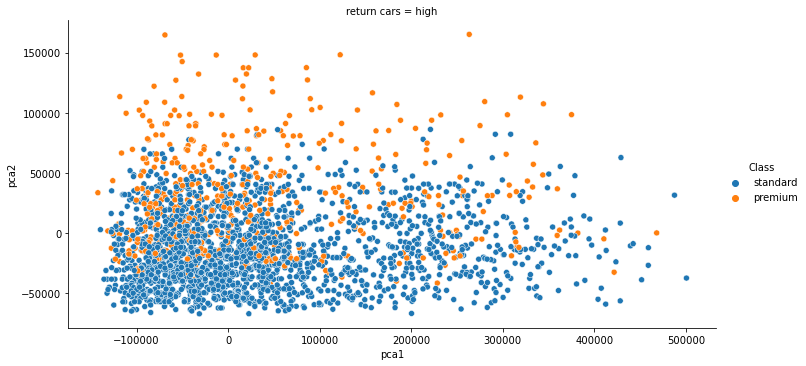

<Figure size 432x288 with 0 Axes>

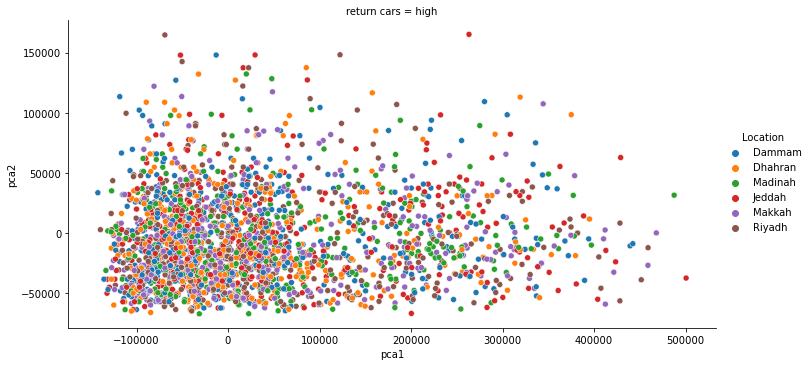

<Figure size 432x288 with 0 Axes>

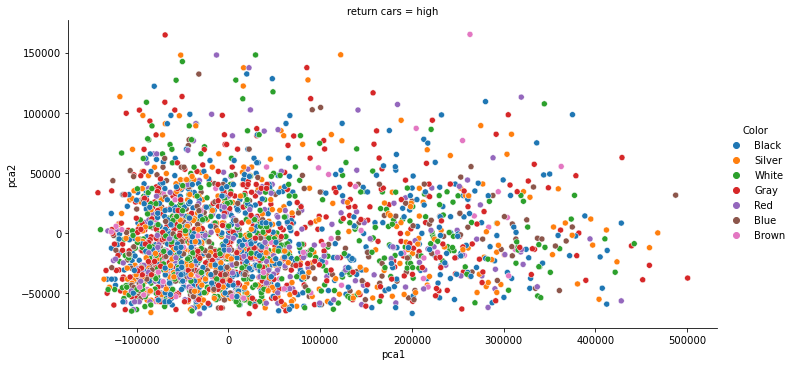

<Figure size 432x288 with 0 Axes>

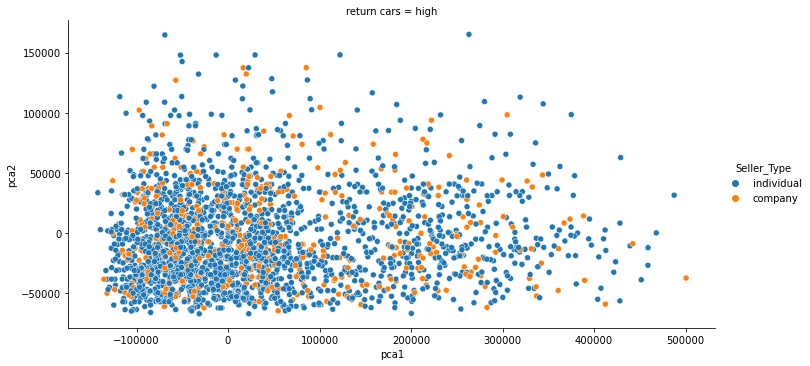

<Figure size 432x288 with 0 Axes>

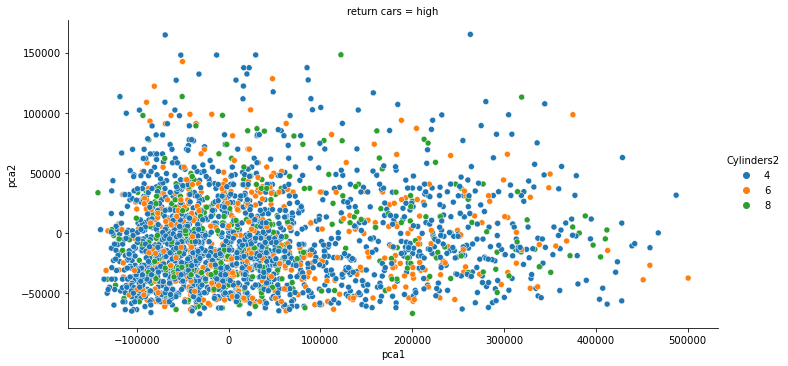

<Figure size 432x288 with 0 Axes>

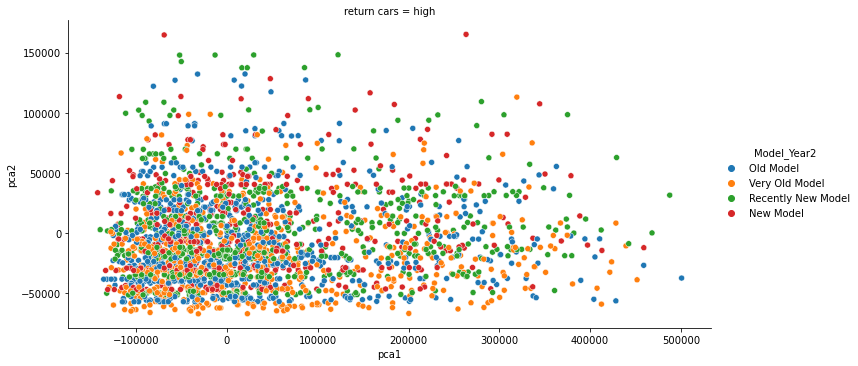

<Figure size 432x288 with 0 Axes>

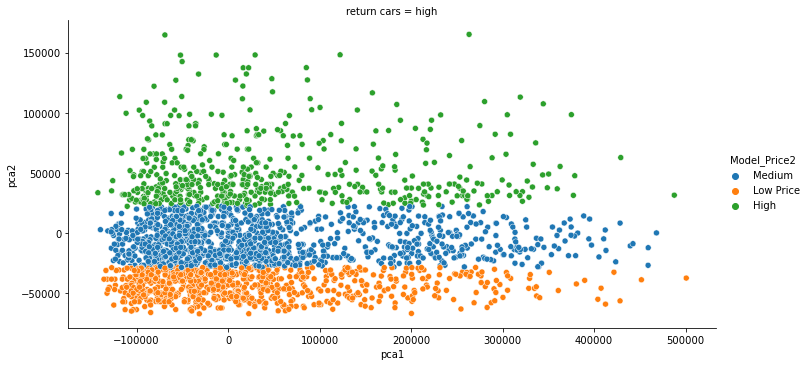

<Figure size 432x288 with 0 Axes>

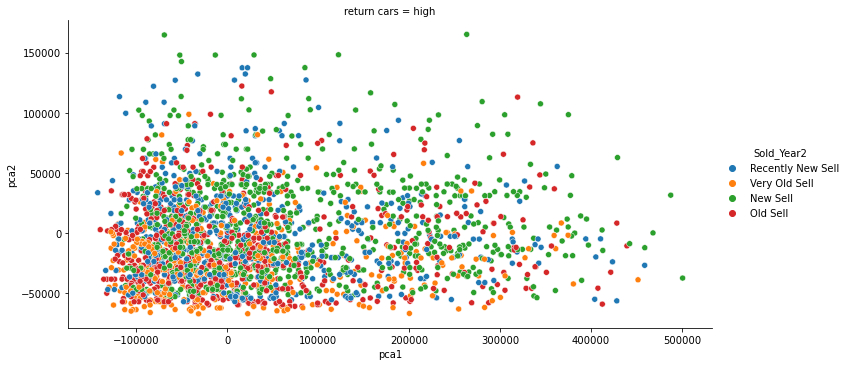

<Figure size 432x288 with 0 Axes>

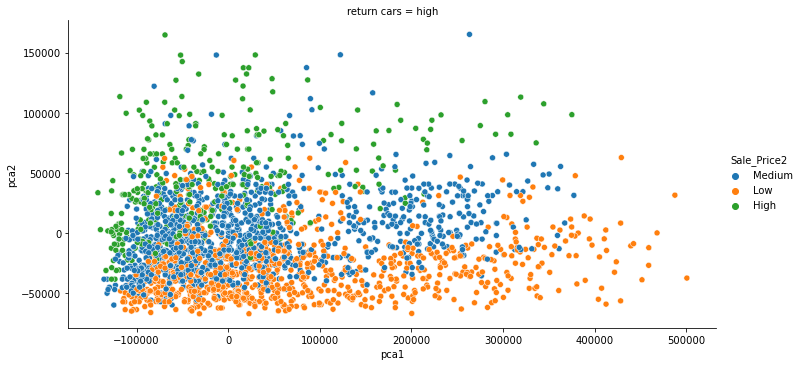

<Figure size 432x288 with 0 Axes>

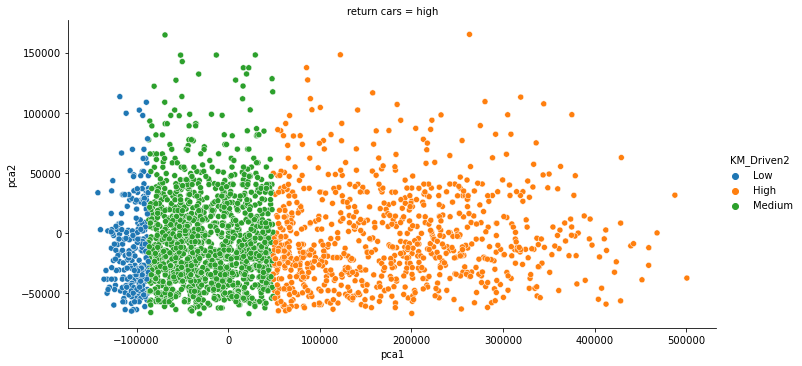

<Figure size 432x288 with 0 Axes>

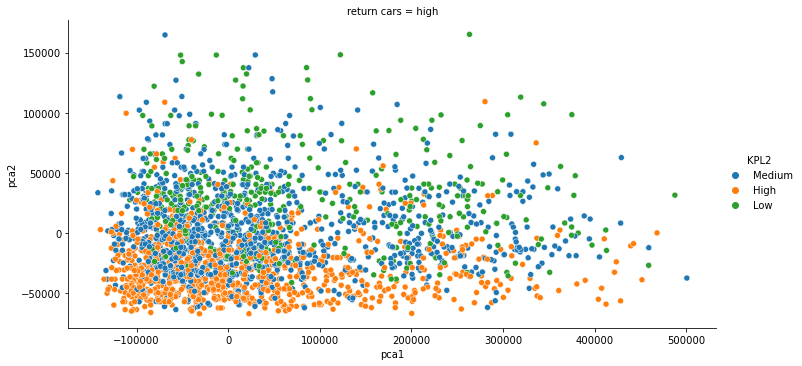

<Figure size 432x288 with 0 Axes>

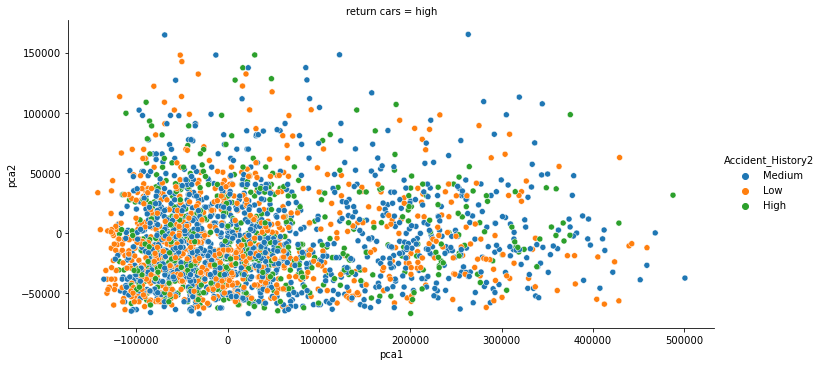

<Figure size 432x288 with 0 Axes>

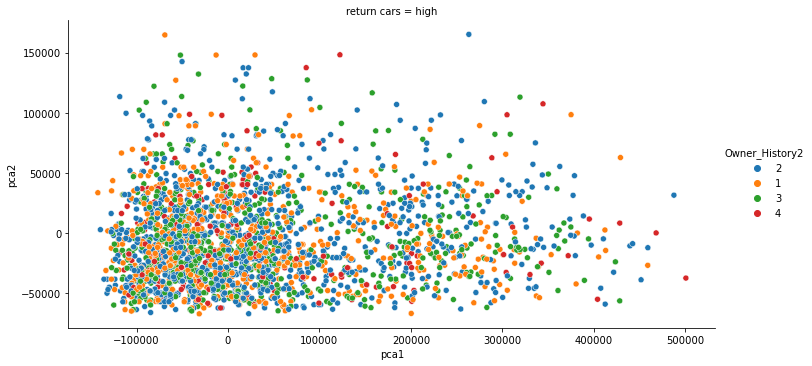

<Figure size 432x288 with 0 Axes>

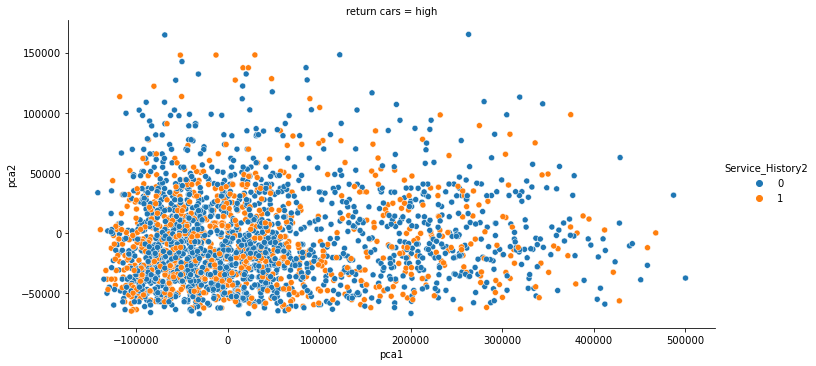

In [39]:
import numpy as np
import pandas as pd
patterns=['Manufacturer','Type','Power','Class','Location','Color','Seller_Type','Cylinders2','Model_Year2','Model_Price2'
         ,'Sold_Year2','Sale_Price2','KM_Driven2','KPL2','Accident_History2','Owner_History2','Service_History2']

sCol = ndf['return cars'] == 'high'
xdf = pdf.loc[sCol,:]
for i in patterns:
    plt.figure()
    sns.relplot(x="pca1",y="pca2",data=xdf,col='return cars',aspect=2, hue=i)
    plt.show()

## Task-7

In [15]:
#import pandas as pd
#import numpy as np
#df= pd.read_csv("Group_19_06_B.csv",delimiter=",")

#df['Sale_Price'] = df['Sale_Price'].apply(lambda x : int(x.replace('SAR','').replace(',',''))if type(x)==str else x)

#df['Model_Price'] = df['Model_Price'].apply(lambda x :int(x.replace('SAR','').replace(',','')) if type(x)==str else x)

cor = df.corr(method = 'pearson') 

display(cor)

print("The correlation between the input variables and Sale Price column is:")
display(cor['Sale_Price'])

Cylinders  Model_Year  Model_Price  Sold_Year  Sale_Price  \
Cylinders          1.000000    0.015649     0.016423   0.010508   -0.008642   
Model_Year         0.015649    1.000000     0.263508   0.900374    0.219964   
Model_Price        0.016423    0.263508     1.000000   0.243092    0.734289   
Sold_Year          0.010508    0.900374     0.243092   1.000000   -0.042028   
Sale_Price        -0.008642    0.219964     0.734289  -0.042028    1.000000   
KM_Driven         -0.000978    0.004792    -0.001153   0.262818   -0.380068   
KPL               -0.327114   -0.006115    -0.535854  -0.006576   -0.271801   
Accident_History  -0.006104    0.002022    -0.008454   0.003917   -0.100160   
Owner_History     -0.017690    0.016805     0.024641   0.021573   -0.014775   
Service_History    0.003196    0.004728    -0.018780   0.000222    0.058397   
PCA1              -0.000981    0.004751    -0.001310   0.262780   -0.380184   
PCA2               0.016422    0.263514     0.999999   0.243437    0.733792   

                  KM_Driven       KPL  Accident_History  Owner_History  \
Cylinders         -0.000978 -0.327114         -0.006104      -0.017690   
Model_Year         0.004792 -0.006115          0.002022       0.016805   
Model_Price       -0.001153 -0.535854         -0.008454       0.024641   
Sold_Year          0.262818 -0.006576          0.003917       0.021573   
Sale_Price        -0.380068 -0.271801         -0.100160      -0.014775   
KM_Driven          1.000000 -0.004860          0.021591       0.028400   
KPL               -0.004860  1.000000          0.001857      -0.006987   
Accident_History   0.021591  0.001857          1.000000       0.001682   
Owner_History      0.028400 -0.006987          0.001682       1.000000   
Service_History   -0.004747  0.032643         -0.012150       0.025288   
PCA1               1.000000 -0.004776          0.021592       0.028396   
PCA2               0.000157 -0.535861         -0.008426       0.024678   

                  Service_History          PCA1          PCA2  
Cylinders                0.003196 -9.806213e-04  1.642177e-02  
Model_Year               0.004728  4.750846e-03  2.635144e-01  
Model_Price             -0.018780 -1.310374e-03  9.999991e-01  
Sold_Year                0.000222  2.627798e-01  2.434370e-01  
Sale_Price               0.058397 -3.801836e-01  7.337918e-01  
KM_Driven               -0.004747  1.000000e+00  1.569374e-04  
KPL                      0.032643 -4.776357e-03 -5.358606e-01  
Accident_History        -0.012150  2.159232e-02 -8.426041e-03  
Owner_History            0.025288  2.839609e-02  2.467834e-02  
Service_History          1.000000 -4.743661e-03 -1.878579e-02  
PCA1                    -0.004744  1.000000e+00  1.254271e-16  
PCA2                    -0.018786  1.254271e-16  1.000000e+00

The correlation between the input variables and Sale Price column is:


Cylinders          -0.008642
Model_Year          0.219964
Model_Price         0.734289
Sold_Year          -0.042028
Sale_Price          1.000000
KM_Driven          -0.380068
KPL                -0.271801
Accident_History   -0.100160
Owner_History      -0.014775
Service_History     0.058397
PCA1               -0.380184
PCA2                0.733792
Name: Sale_Price, dtype: float64

## Task-8

In [26]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = df.select_dtypes(include='object').columns
dfcopy = df.copy(deep=True)
dfcopy = dfcopy.drop(index=2, columns=data)

X = dfcopy.iloc[:,:-1].values
y = dfcopy.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

scaler = StandardScaler()
scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])


X_train = A_train[:,:-1]
y_train = A_train[:,-1]

reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE hat uses Ridge is:', mean_squared_error(y_test, y_pred2))



The MSE hat uses Ridge is: 7938673527.117552


## Task-9

In [27]:
from sklearn.linear_model import LassoCV
A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

The MSE using Lasso is: 1.8910329165300588e-06


## Task-10

## References